In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt

2023-12-23 16:16:33.100057: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-23 16:16:33.105781: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 16:16:33.195621: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 16:16:33.195690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 16:16:33.197806: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
def imshow(img, st='Untitled Image'):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(st)
    plt.show()

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

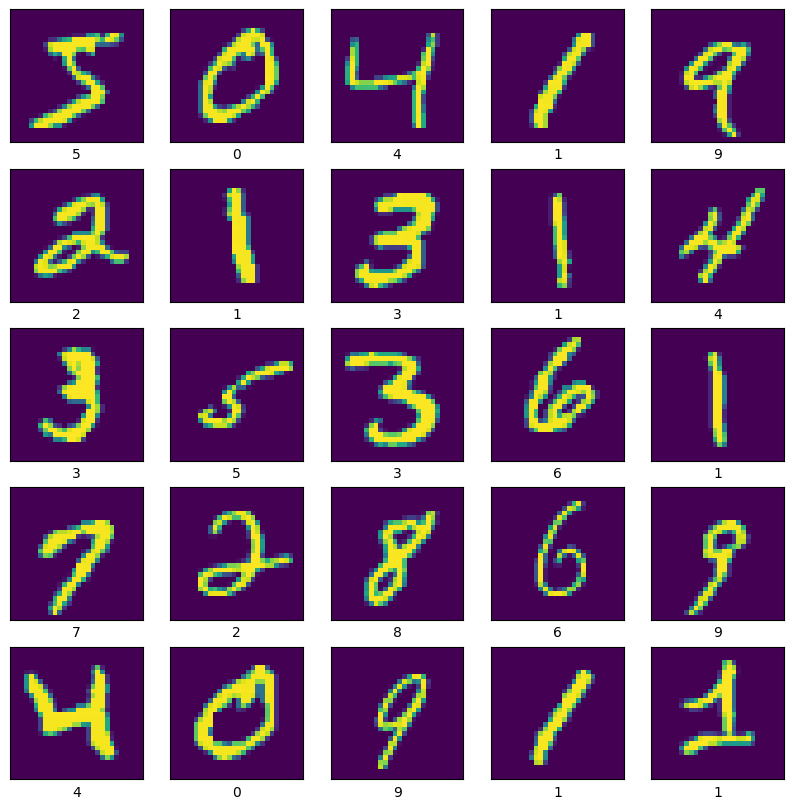

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train[i])
plt.show()

In [6]:
model = models.Sequential()
x_train, x_test = x_train / 255, x_test / 255
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=192, activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10


/home/balaji/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 13s 6ms/step - loss: 0.2077 - accuracy: 0.9365 - val_loss: 0.0987 - val_accuracy: 0.9696
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0904 - accuracy: 0.9722 - val_loss: 0.1081 - val_accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0648 - accuracy: 0.9794 - val_loss: 0.0743 - val_accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0490 - accuracy: 0.9840 - val_loss: 0.0857 - val_accuracy: 0.9737
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0665 - val_accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0905 - val_accuracy: 0.9756
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0883 - val_accuracy: 0.9

313/313 - 1s - loss: 0.1011 - accuracy: 0.9792 - 897ms/epoch - 3ms/step


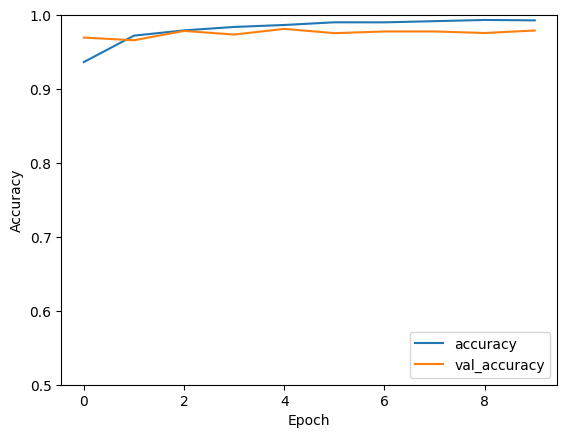

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [11]:
print(test_acc)

0.979200005531311


In [16]:
model.save('output')

INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets
